In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.misc import derivative

In [3]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [4]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

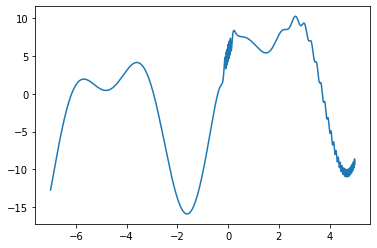

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

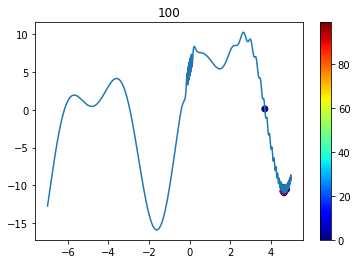

In [6]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

In [61]:

def gradient_descent(function, X, max_it):
    x = X.copy()
    index = np.random.randint(0, len(x))
    point = x[index] # sample a point to start
    derivative_in_point = derivative(function, point)
    it = 0 # current iteration
    points = [] # list of the points we have inspected
    threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
    while np.abs(derivative_in_point)> threshold and it<max_it: 
        if derivative_in_point < 0: # the slope is negative
            x = x[index:] # since the slope is negative, the local minimum should be on the right
            index = np.random.randint(0, len(x)) # randomly select an index
            point = x[index] # sample the next point in the new interval
            points.append(point) # store for later
            derivative_in_point = derivative(function, point) # compute the derivative in the new point

        else:
            x = x[0:index+1] # the slope is positive, so the minimum should be on the left
            index = np.random.randint(0, len(x))
            point = x[index]
            points.append(point)
            derivative_in_point = derivative(function, point)
        it +=1

    return points, it


    

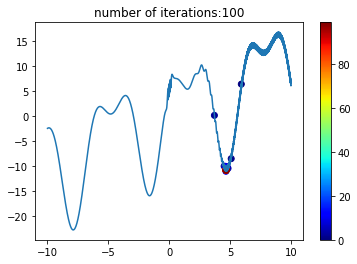

In [77]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x
    
X = np.linspace(-10,10,10000)
Y = function(X)


points, it = gradient_descent(function, X, 100)
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(f'number of iterations:{str(it)}')
plt.colorbar()

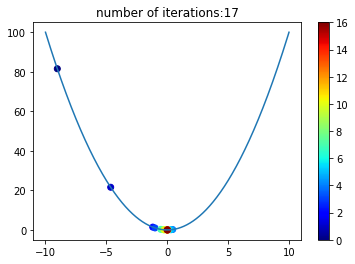

In [78]:
def function(x):
    return x**2



X = np.linspace(-10,10,10000)
Y = function(X)


points, it = gradient_descent(function, X, 100)
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(f'number of iterations:{str(it)}')
plt.colorbar()

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [7]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [8]:
area_under_the_curve = result[0]

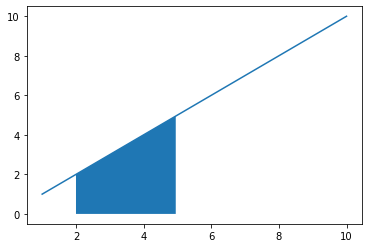

In [9]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

In [19]:
a, b = [2, 5]
def f(x):
    return 5 * np.ones_like(x)

result = integrate.quad(f, a, b)
result

(15.0, 1.6653345369377348e-13)

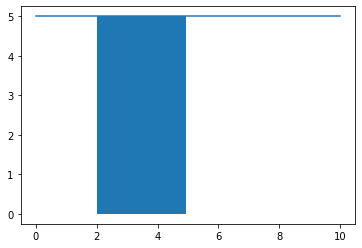

In [21]:
x = np.linspace(0, 10, 100)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

In [22]:
# The integral of 1/x being ln(x), it would be impossible to compute the integral for negative values as well as zero.
# The best we can do is integrating over an intervall of (0, 1]

a, b = 0.0001, 1

def f(x):
    return 1/x


result = integrate.quad(f, a, b)[0]
result

9.210340371976205

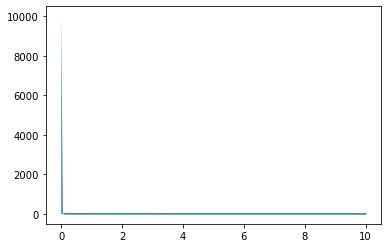

In [28]:
x = np.linspace(0.1, 10, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

In [29]:
f(section)

array([1.00000000e+04, 1.99600798e+01, 9.99000999e+00, 6.66222518e+00,
       4.99750125e+00, 3.99840064e+00, 3.33222259e+00, 2.85632676e+00,
       2.49937516e+00, 2.22172850e+00, 1.99960008e+00, 1.81785130e+00,
       1.66638894e+00, 1.53822489e+00, 1.42836738e+00, 1.33315558e+00,
       1.24984377e+00, 1.17633220e+00, 1.11098767e+00, 1.05252079e+00])

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

In [39]:
# integral manually
-np.cos(np.pi) + np.cos(-np.pi)

0.0

In [34]:
a, b = -np.pi,  np.pi
def f(x):
    return np.sin(x)


integrate.quad(f, a, b)[0]


0.0

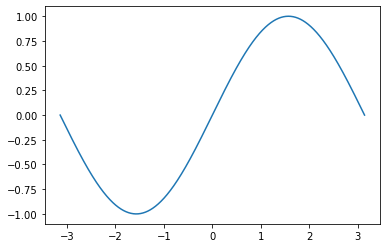

In [36]:
# No need to plot the surface under the curve since it's zero. Let's plot sin(x), at least :)

x = np.linspace(-np.pi, np.pi, 1000)

plt.plot(x, f(x))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


In [42]:
# integral manually
np.sin(np.pi) - np.sin(-np.pi)

2.4492935982947064e-16

In [43]:
a, b = -np.pi,  np.pi
def f(x):
    return np.cos(x)


integrate.quad(f, a, b)[0]

2.615901373506474e-16

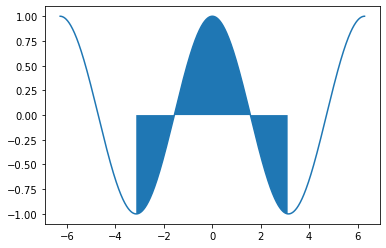

In [46]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

In [47]:
a, b = -np.pi,  np.pi
def f(x):
    return np.sin(x) - np.cos(2*x)


integrate.quad(f, a, b)[0]

5.231802747012948e-16

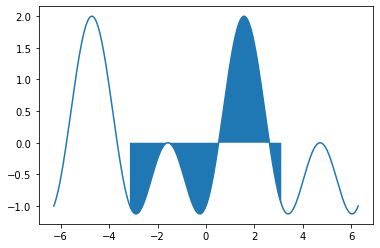

In [48]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))